# Datasets and Relations
[![View On GitHub](https://img.shields.io/badge/View_in_Github-grey?logo=github)](https://github.com/Qrlew/docs/blob/main/tutorials/dataset_from_queries.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Qrlew/pyqrlew/blob/main/examples/dataset_from_queries.ipynb)

In this short tutorial, we setup a local database, insert a demo dataset from [`qrlew-dataset`](https://pypi.org/project/qrlew-datasets/) and show how to create `Relation`s from SQL queries and derived `Dataset`s (set of `Relation`s). 

## Setup a local database

In [ ]:
%%capture
# Load the database
# Inspired by https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/postgresql.ipynb#scrollTo=YUj0878jPyz7
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql-14 graphviz
# Start postgresql server
!sudo sed -i "s/port = 5432/port = 5433/g" /etc/postgresql/14/main/postgresql.conf
!sudo service postgresql start
# Set password
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'pyqrlew-db'"
!pip install -U pyqrlew matplotlib graphviz

## Insert data

In [1]:
import pyqrlew as qrl
from pyqrlew.io import PostgreSQL

# Setup a default database 
DB = PostgreSQL()
# Insert a demo dataset
DB.load_extract()
dataset = qrl.Dataset.from_database(name='extract', engine=DB.engine(), schema_name='extract')

Error response from daemon: network with name qrlew-net already exists


['extract', 'extract', 'beacon']
SELECT * FROM extract.beacon


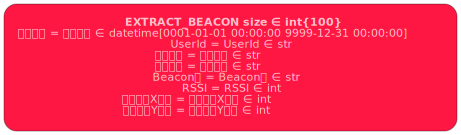

['extract', 'extract', 'census']
SELECT * FROM extract.census


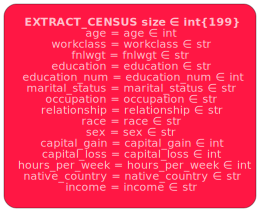

In [3]:
from graphviz import Source
from IPython.display import display

for path, relation in dataset.relations():
    print(path)
    print(relation.to_query())
    display(Source(relation.dot()))

## Build `Relation`s and `Dataset`s

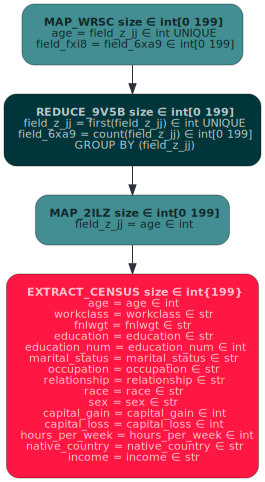

In [4]:
derived_relation = dataset.relation('SELECT age, count(age) FROM extract.census GROUP BY age')
Source(derived_relation.dot())

In [5]:
queries = [
    (("schema_name", "sch", "tab1"), 'SELECT age, count(age) FROM extract.census GROUP BY age LIMIT 10'),
    (("schema_name", "sch", "sum_age"), 'SELECT SUM(age) FROM extract.census'),
    (("schema_name", "new_sch", "bacon"), 'SELECT * FROM extract.beacon')
]

Dataset: {}
Schema: {"name": "schema_name", "type": {"name": "Struct", "struct": {"fields": [{"name": "sarus_data", "type": {"name": "Union", "union": {"fields": [{"name": "new_sch", "type": {"name": "Union", "union": {"fields": [{"name": "bacon", "type": {"name": "Struct", "struct": {"fields": [{"name": "検知日時", "type": {"name": "Datetime", "datetime": {"format": "%Y-%m-%d %H:%M:%S.%9f", "min": "0001-01-01 00:00:00.000000000", "max": "9999-12-31 00:00:00.000000000"}}}, {"name": "UserId", "type": {"name": "Text", "text": {}}}, {"name": "所属部署", "type": {"name": "Text", "text": {}}}, {"name": "フロア名", "type": {"name": "Text", "text": {}}}, {"name": "Beacon名", "type": {"name": "Text", "text": {}}}, {"name": "RSSI", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}, {"name": "マップのX座標", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}, {"name": "マップのY座標", "type": {"name": "Integer", "int

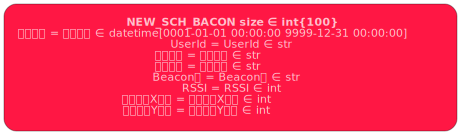

['schema_name', 'sch', 'sum_age']
SELECT * FROM sch.sum_age


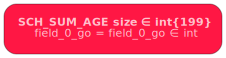

['schema_name', 'sch', 'tab1']
SELECT * FROM sch.tab1


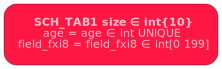

In [6]:
derived_dataset = dataset.from_queries(queries)
print(derived_dataset)
for path, relation in derived_dataset.relations():
    print(path)
    print(relation.to_query())
    display(Source(relation.dot()))

In [7]:
derived_dataset.schema

'{"name": "schema_name", "type": {"name": "Struct", "struct": {"fields": [{"name": "sarus_data", "type": {"name": "Union", "union": {"fields": [{"name": "new_sch", "type": {"name": "Union", "union": {"fields": [{"name": "bacon", "type": {"name": "Struct", "struct": {"fields": [{"name": "検知日時", "type": {"name": "Datetime", "datetime": {"format": "%Y-%m-%d %H:%M:%S.%9f", "min": "0001-01-01 00:00:00.000000000", "max": "9999-12-31 00:00:00.000000000"}}}, {"name": "UserId", "type": {"name": "Text", "text": {}}}, {"name": "所属部署", "type": {"name": "Text", "text": {}}}, {"name": "フロア名", "type": {"name": "Text", "text": {}}}, {"name": "Beacon名", "type": {"name": "Text", "text": {}}}, {"name": "RSSI", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}, {"name": "マップのX座標", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}, {"name": "マップのY座標", "type": {"name": "Integer", "integer": {"min": "-92

In [8]:
derived_dataset.size

'{"statistics": {"name": "Union", "union": {"fields": [{"name": "new_sch", "statistics": {"name": "Union", "union": {"fields": [{"name": "bacon", "statistics": {"struct": {"size": "100"}}}]}}}, {"name": "sch", "statistics": {"name": "Union", "union": {"fields": [{"name": "tab1", "statistics": {"struct": {"size": "10"}}}, {"name": "sum_age", "statistics": {"struct": {"size": "199"}}}]}}}]}}}'